## Instacart Customer Behavior Analysis

This project focuses on exploring and visualizing customer ordering habits on the Instacart grocery delivery platform using exploratory data analysis (EDA).

The dataset contains information about customer orders, products, departments, and aisles. It was originally released for a Kaggle competition and has been slightly modified for educational use. The objective of this analysis is to uncover patterns in when customers place orders, what products are most frequently purchased, and how often items are reordered.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [8]:
orders = pd.read_csv('instacart_orders.csv', sep=';')

In [9]:
products = pd.read_csv('products.csv',sep=';')

In [10]:
aisles = pd.read_csv('aisles.csv',sep=';')

In [11]:
departments = pd.read_csv('departments.csv',sep=';')

In [12]:
order_products = pd.read_csv('order_products.csv',sep=';')

In [13]:
datasets = [orders, products, aisles, departments, order_products]
dataset_names = ['orders', 'products', 'aisles', 'departments', 'order_products']
for name, data in zip(dataset_names, datasets):
    print(name)
    print(data.info())
    print(data.head(), "\n")

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4          

In [14]:
duplicated_orders = orders.duplicated()
duplicated_orders.shape[0]

478967

In [15]:
check_order = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
check_order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [16]:
orders.drop_duplicates()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [17]:
duplicate_orders = orders[orders.duplicated()]
duplicate_orders.shape[0]

15

In [18]:
duplicate_order_id = orders.duplicated(subset='order_id')
duplicate_order_id.shape[0]

478967

In [19]:
duplicated_products = products.duplicated()
duplicated_products.shape[0]
orders.drop_duplicates()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [20]:
duplicated_products_id = products.duplicated(subset='product_id')
duplicated_products_id.shape[0]
orders = orders.drop_duplicates(subset='order_id')

In [21]:
duplicated_product_names = products.duplicated(subset='product_name')
products['product_name_low'] = products['product_name'].str.lower()

In [22]:
duplicate_product_names = products[products.duplicated(subset='product_name')]
duplicate_product_names.shape[0]

1257

In [23]:
dublicated_departments = departments.duplicated()
dublicated_departments.shape[0]

21

In [24]:
departments.drop_duplicates()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [25]:
check_departments = departments[departments.duplicated()]
check_departments.shape[0]

0

In [26]:
duplicate_aisles = aisles.duplicated()
duplicate_aisles.shape[0]

134

In [27]:
aisles = aisles.drop_duplicates()

In [28]:
duplicate_aisles = aisles[aisles.duplicated()]
duplicate_aisles.shape[0]

0

In [29]:
duplicate_order_products = order_products.duplicated(subset=['order_id', 'product_id'])
duplicate_order_products.shape[0]

4545007

In [30]:
order_products = order_products.drop_duplicates(subset=['order_id', 'product_id'])
duplicate_order_products = order_products.duplicated(subset=['order_id', 'product_id'])
duplicate_order_products.shape[0]


4545007

In [31]:
missing_product_names = products[products['product_name'].isnull()]

In [32]:
aisle_100_missing_names = missing_product_names[missing_product_names['aisle_id'] == 100]

In [33]:
department_21_missing_names = missing_product_names[missing_product_names['department_id'] == 21]

In [34]:
aisle_100 = aisles[aisles['aisle_id'] == 100]
department_21 = departments[departments['department_id'] == 21]
print(aisle_100)
print()
print(department_21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [35]:
products['product_name'].fillna('Unknown', inplace=True)
missing_product_names = products[products['product_name'].isnull()]
missing_product_names.shape[0]

0

In [37]:
missing_days = orders[orders['days_since_prior_order'].isnull()]
missing_days.shape[0]

28817

In [38]:
missing_first_order = missing_days[missing_days['order_number'] != 1]
missing_first_order.shape[0]

0

In [39]:
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isnull()]

In [40]:
min = order_products['add_to_cart_order'].min()
max = order_products['add_to_cart_order'].max()
print(min,max)

1.0 64.0


In [41]:
order_ids_with_missing_add_to_cart = missing_add_to_cart_order['order_id'].unique()
order_ids_with_missing_add_to_cart.shape[0]

70

In [42]:
orders_with_missing_values = order_products[order_products['order_id'].isin(order_ids_with_missing_add_to_cart)]
order_counts = orders_with_missing_values['order_id'].value_counts()
orders_with_more_than_64_products = order_counts[order_counts > 64]
orders_with_more_than_64_products.shape[0]

70

In [43]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('Int64', errors='ignore')

In [44]:
order_hour_of_day = orders['order_hour_of_day'].unique()
sorted(order_hour_of_day)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [45]:
order_dow = orders['order_dow'].unique()
sorted(order_dow)

[0, 1, 2, 3, 4, 5, 6]

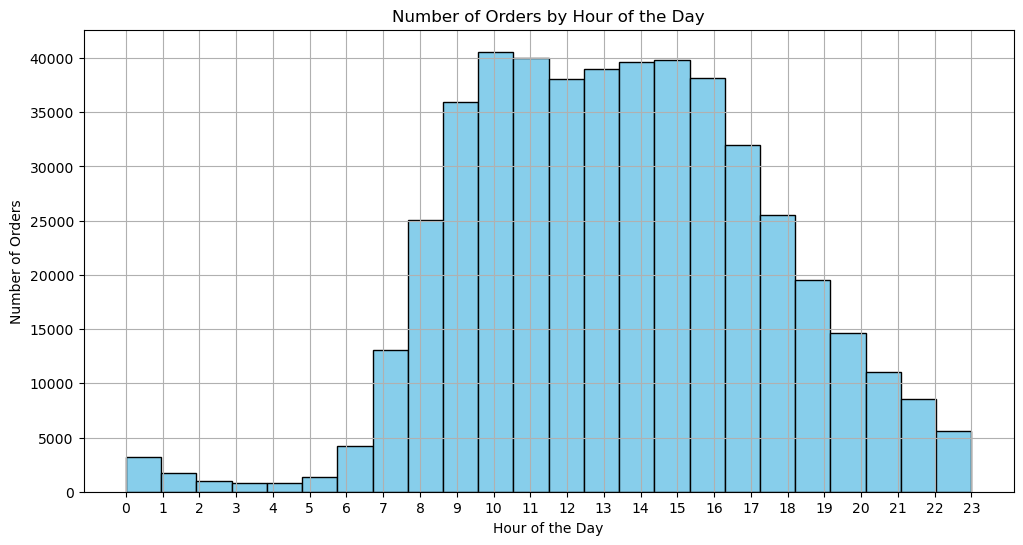


Conclusion:
The histogram shows the distribution of orders across different hours of the day. We observe that there are specific peaks and troughs in ordering behavior.
- The highest number of orders occur between 9 AM and 10 AM, and again between 3 PM and 4 PM.
- There are significantly fewer orders during the early morning hours (midnight to 5 AM).

This information is valuable for business planning and resource allocation. For instance, increasing staffing levels during peak hours can help manage the higher order volume more efficiently, while resources can be minimized during low activity periods to optimize operational costs.



In [46]:
orders['order_hour_of_day'].plot(kind='hist', 
                                 bins=24, 
                                 color='skyblue', 
                                 edgecolor='black', 
                                 figsize=(12, 6), 
                                 grid=True)

plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.show()

conclusion = """
Conclusion:
The histogram shows the distribution of orders across different hours of the day. We observe that there are specific peaks and troughs in ordering behavior.
- The highest number of orders occur between 9 AM and 10 AM, and again between 3 PM and 4 PM.
- There are significantly fewer orders during the early morning hours (midnight to 5 AM).

This information is valuable for business planning and resource allocation. For instance, increasing staffing levels during peak hours can help manage the higher order volume more efficiently, while resources can be minimized during low activity periods to optimize operational costs.
"""

print(conclusion)

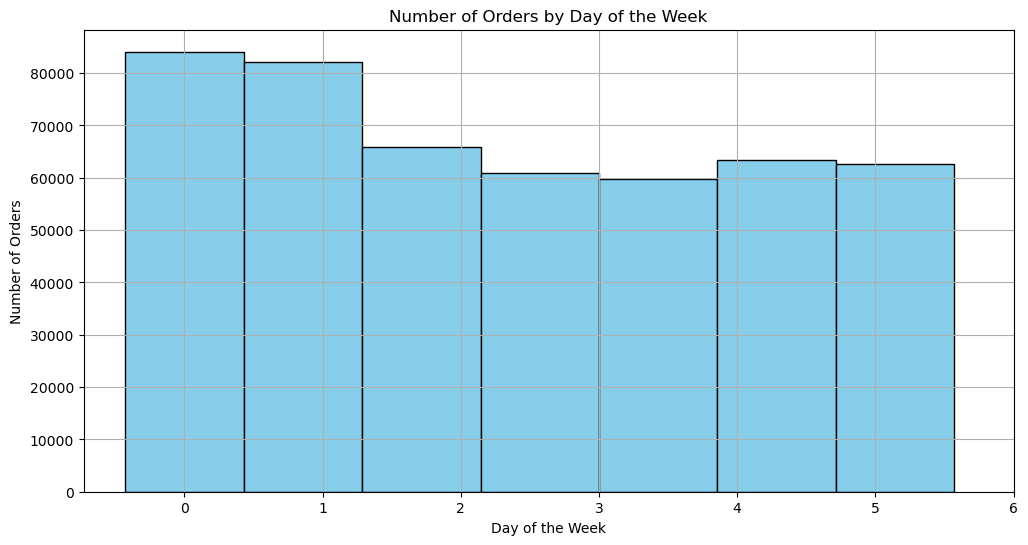

In [47]:
orders['order_dow'].plot(kind='hist',
                         bins=7,
                         color='skyblue',
                         edgecolor='black',
                         title='Number of Orders by Day of the Week',
                         figsize=(12, 6),
                         xlabel='Day of the Week',
                         ylabel='Number of Orders',
                         grid=True,
                         align='left'
                        )
plt.xticks(range(7))
plt.show()

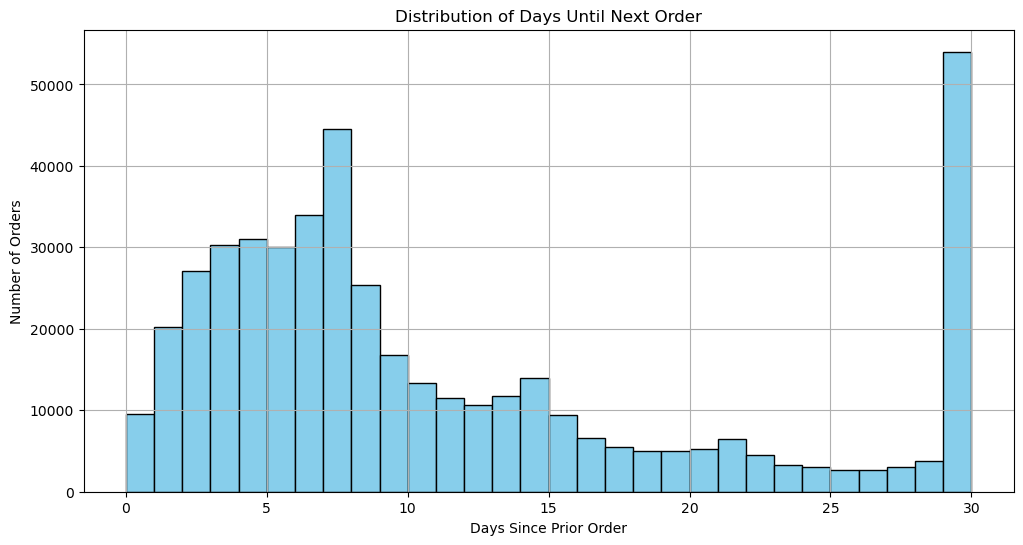

In [48]:
orders['days_since_prior_order'].dropna().plot(kind='hist', 
                                               bins=30, 
                                               color='skyblue', 
                                               edgecolor='black', 
                                               title='Distribution of Days Until Next Order', 
                                               figsize=(12, 6), 
                                               xlabel='Days Since Prior Order', 
                                               ylabel='Number of Orders', 
                                               grid=True
                                              )
plt.show()


In [49]:
min_day = orders['days_since_prior_order'].min()
max_day = orders['days_since_prior_order'].max()
print(min_day)
print()
print(max_day)

0.0

30.0


In [50]:
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6] 

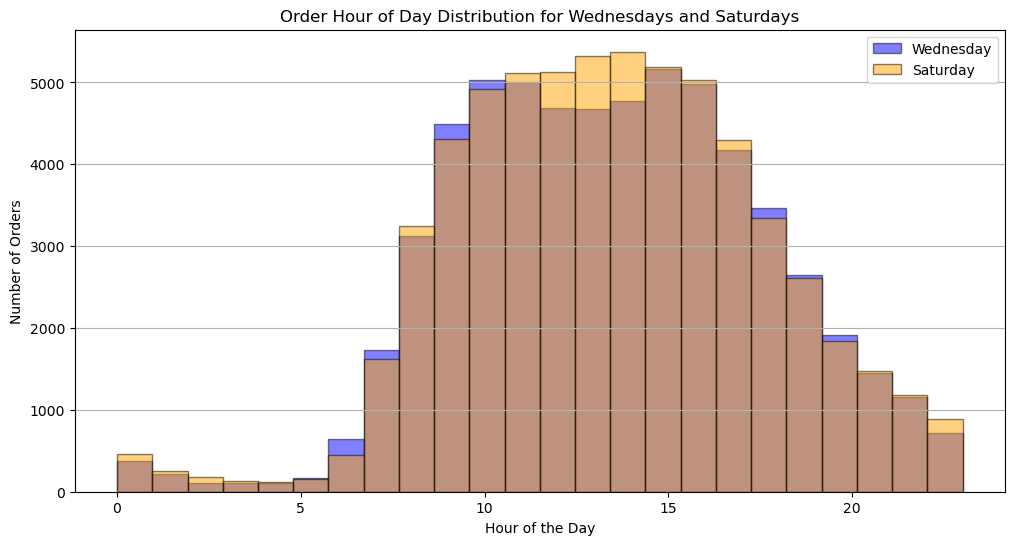

In [51]:
plt.figure(figsize=(12, 6))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, color='blue', edgecolor='black', alpha=0.5, label='Wednesday')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, color='orange', edgecolor='black', alpha=0.5, label='Saturday')
plt.title('Order Hour of Day Distribution for Wednesdays and Saturdays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(axis='y')
plt.show()

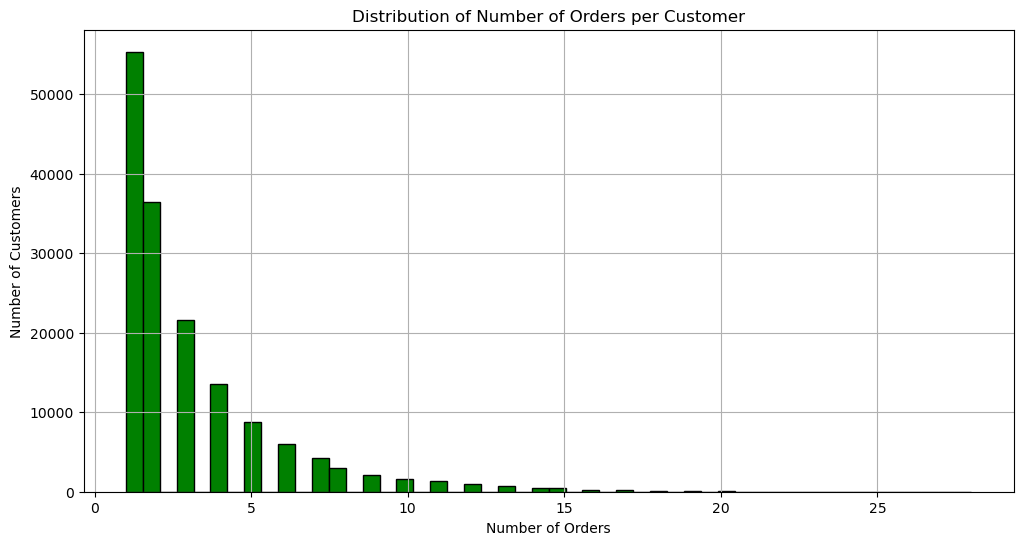

In [52]:
orders_per_customer = orders['user_id'].value_counts()
orders_per_customer.plot(kind='hist', 
                         bins=50, 
                         color='green', 
                         edgecolor='black', 
                         figsize=(12, 6), 
                         title='Distribution of Number of Orders per Customer', 
                         xlabel='Number of Orders', 
                         ylabel='Number of Customers', 
                         grid=True
                        )
plt.show()

In [53]:
top_20_products = order_products['product_id'].value_counts().head(20).index
top_20_products_df = products[products['product_id'].isin(top_20_products)]
print(top_20_products_df[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
40705       40706    Organic Grape Tomatoes
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49682       49683            Cucumber Kirby


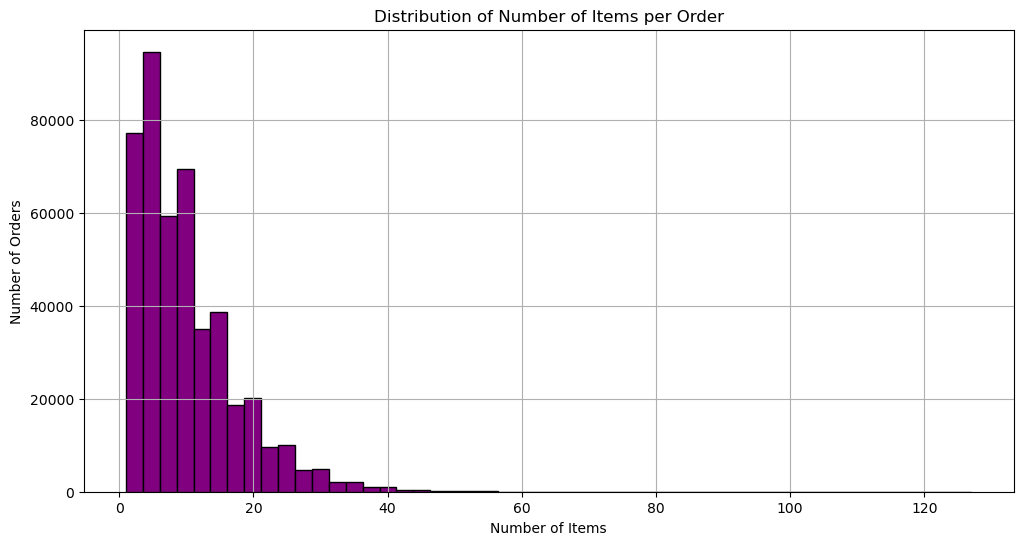

In [54]:
items_per_order = order_products['order_id'].value_counts()

items_per_order.plot(kind='hist', 
                     bins=50, 
                     color='purple', 
                     edgecolor='black', 
                     figsize=(12, 6), 
                     title='Distribution of Number of Items per Order', 
                     xlabel='Number of Items', 
                     ylabel='Number of Orders', 
                     grid=True
                    )

plt.show()

In [55]:
top_20_reordered = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20).index
top_20_reordered_df = products[products['product_id'].isin(top_20_reordered)]
print(top_20_reordered_df[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


In [56]:
reorder_proportions = order_products.groupby('product_id')['reordered'].mean().reset_index()
reorder_proportions = reorder_proportions.merge(products[['product_id', 'product_name']], on='product_id')
print(reorder_proportions)

       product_id  reordered  \
0               1   0.564286   
1               2   0.000000   
2               3   0.738095   
3               4   0.510204   
4               7   0.500000   
...           ...        ...   
45568       49690   0.800000   
45569       49691   0.430556   
45570       49692   0.416667   
45571       49693   0.440000   
45572       49694   0.333333   

                                            product_name  
0                             Chocolate Sandwich Cookies  
1                                       All-Seasons Salt  
2                   Robust Golden Unsweetened Oolong Tea  
3      Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                         Pure Coconut Water With Orange  
...                                                  ...  
45568                      HIGH PERFORMANCE ENERGY DRINK  
45569                      ORIGINAL PANCAKE & WAFFLE MIX  
45570    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR  
45571                    

In [57]:
customer_reorder_proportions = order_products.groupby('order_id')['reordered'].mean().reset_index()
customer_reorder_proportions = customer_reorder_proportions.merge(orders[['order_id', 'user_id']], on='order_id')
customer_reorder_proportions = customer_reorder_proportions.groupby('user_id')['reordered'].mean().reset_index()
print(customer_reorder_proportions)

        user_id  reordered
0             2   0.038462
1             4   0.000000
2             5   0.666667
3             6   0.000000
4             7   0.944444
...         ...        ...
149621   206203   0.222222
149622   206206   0.690476
149623   206207   0.815000
149624   206208   0.731443
149625   206209   0.347222

[149626 rows x 2 columns]


In [58]:
first_cart_items = order_products[order_products['add_to_cart_order'] == 1]
top_20 = first_cart_items['product_id'].value_counts().head(20).index
top_20_df = products[products['product_id'].isin(top_20)]
print(top_20_df[['product_id', 'product_name']])

       product_id                 product_name
195           196                         Soda
5784         5785  Organic Reduced Fat 2% Milk
12340       12341                Hass Avocados
13175       13176       Bag of Organic Bananas
16796       16797                 Strawberries
19659       19660                 Spring Water
21136       21137         Organic Strawberries
21902       21903         Organic Baby Spinach
24851       24852                       Banana
26208       26209                        Limes
27085       27086                  Half & Half
27844       27845           Organic Whole Milk
27965       27966          Organic Raspberries
38688       38689     Organic Reduced Fat Milk
43351       43352                  Raspberries
44631       44632   Sparkling Water Grapefruit
47208       47209         Organic Hass Avocado
47625       47626                  Large Lemon
47765       47766              Organic Avocado
49234       49235          Organic Half & Half


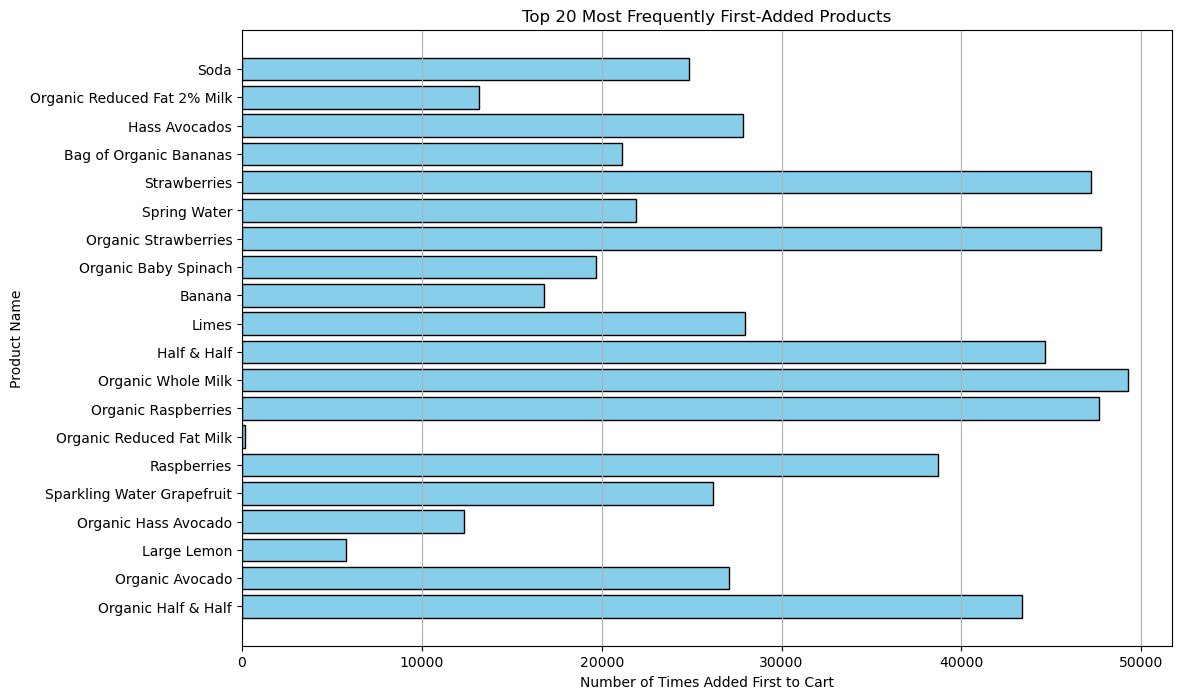

In [59]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_df['product_name'], top_20.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Times Added First to Cart')
plt.ylabel('Product Name')
plt.title('Top 20 Most Frequently First-Added Products')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# Overall Project Summary

This project focused on analyzing Instacart's dataset to understand customer behavior, popular products, and trends in ordering patterns. Here's a summary of the key steps and insights gained:

## Data Preprocessing

### 1. Duplicate Values Handling:
- Checked and removed duplicate entries in orders, products, departments, aisles, and `order_products` data.

### 2. Missing Values Handling:
- Filled missing product names with `'Unknown'`.
- Checked for missing values in `orders` and `order_products` data.
- Replaced missing values in `order_products` data with `999` and converted to integer type.

## Exploratory Data Analysis (EDA)

### 3. Data Verification:
- Verified the sensibility of `'order_hour_of_day'` and `'order_dow'` values in the orders table.

### 4. Insights from Analysis:
- Identified peak shopping times and days of the week for grocery shopping.
- Analyzed the distribution of days until the next order.
- Compared the distribution of `'order_hour_of_day'` on Wednesdays and Saturdays.
- Explored the distribution of orders per customer.
- Identified the top 20 most popular products.
- Analyzed the distribution of items per order.
- Identified the top 20 most reordered items.
- Calculated the proportion of reorders for each product and customer.
- Identified the top 20 items added first to the cart.

## Key Findings

- Most orders are placed during daytime hours, with a
